## **Unsupervised Learning on Country**

**Data**

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [199]:
country_data = pd.read_csv("Country-data.csv")

In [200]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [201]:
list_Country = list(country_data.columns)
list_Country.remove('country')

In [202]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [203]:
country_data.shape

(167, 10)

In [204]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [205]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [206]:
country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Exploratory Data Analysis**

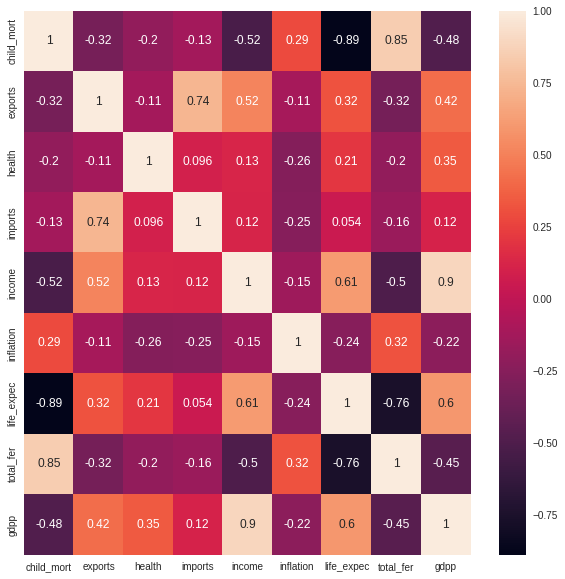

In [207]:
plt.figure(figsize = (10, 10))
sns.heatmap(country_data.corr(), annot = True)

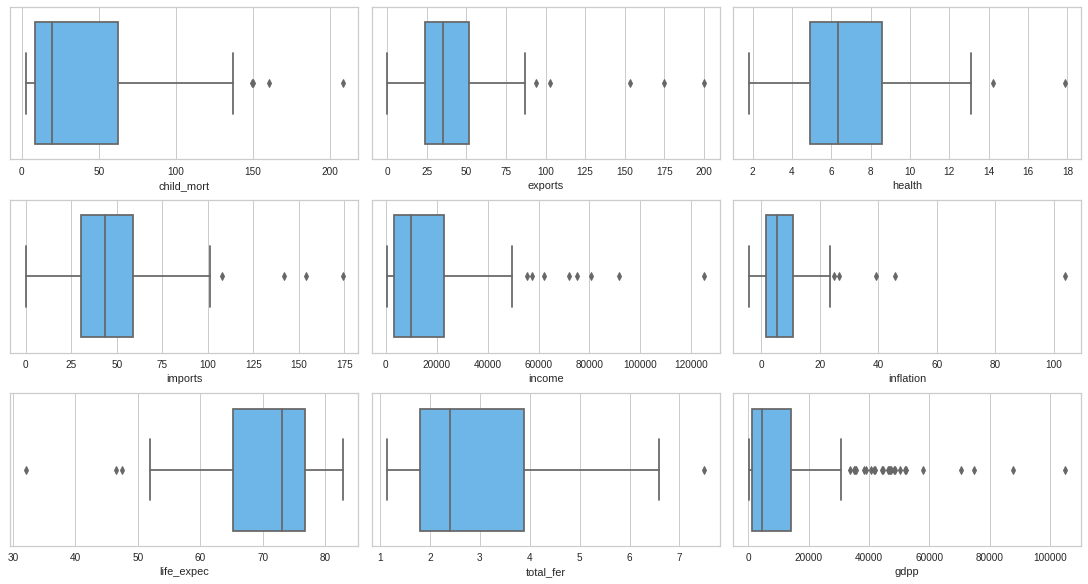

In [208]:
colors = ['#DB1C18','#DBDB3B','#5bb9fc']
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
int_cols= country_data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=country_data[i], ax=ax[x], color=colors[2])

In [209]:
for i in int_cols:
    fig=px.choropleth(data_frame=country_data, locationmode='country names', locations='country', color=i, title=f'{i}')
    fig.show()

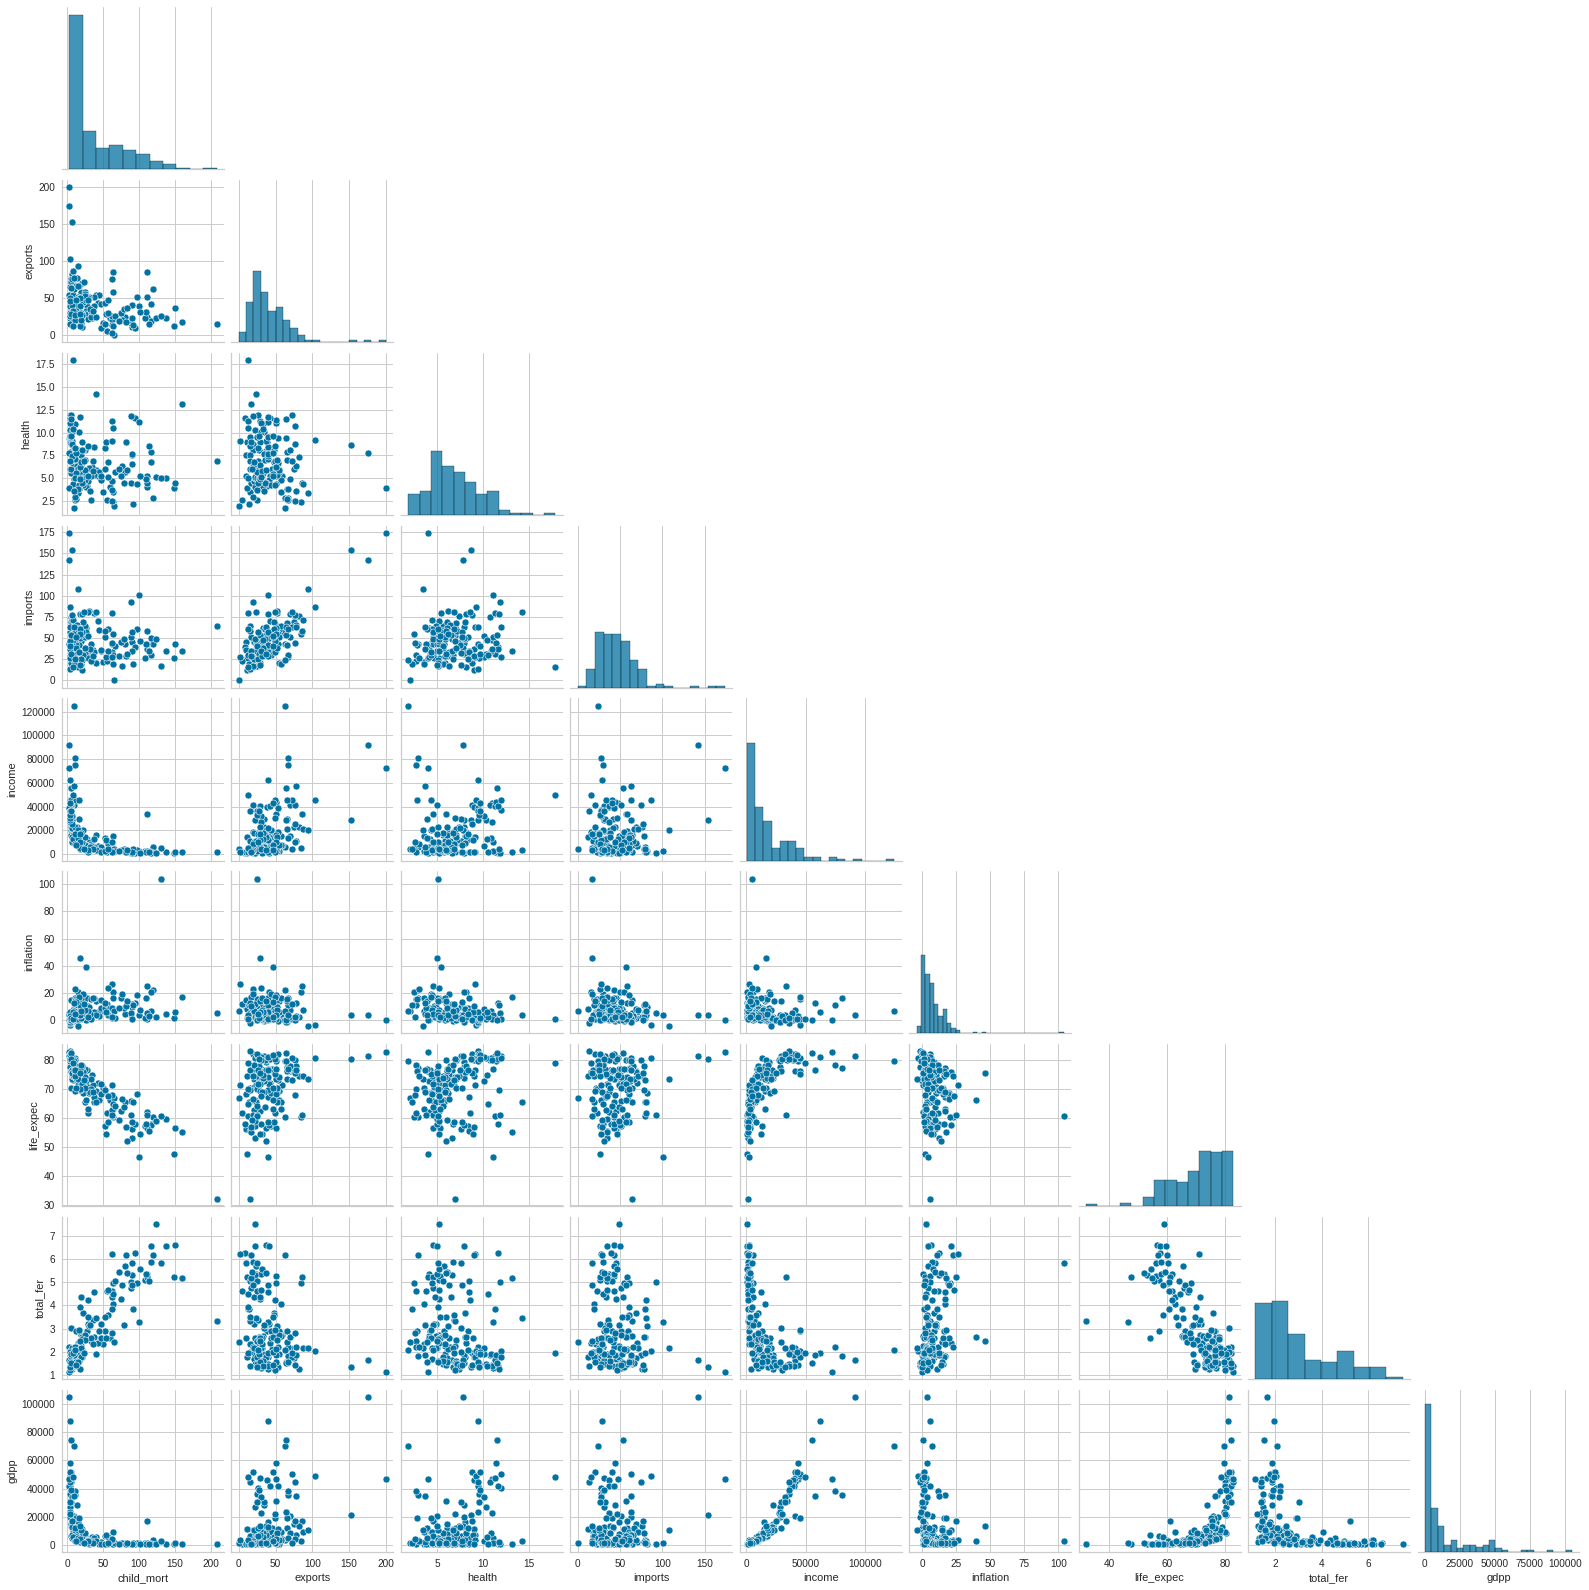

In [210]:
sns.pairplot(country_data, corner =True)

**Preprocessing**

In [211]:
from sklearn.preprocessing import StandardScaler
country_data_scaled = StandardScaler().fit_transform(country_data.drop(['country'], axis=1))

In [212]:
country_data_scaled.shape

(167, 9)

In [213]:
country_data_scaled = pd.DataFrame(country_data_scaled)
country_data_scaled.columns = list_Country

In [214]:
country_data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


**K-Means Clustering**

In [215]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

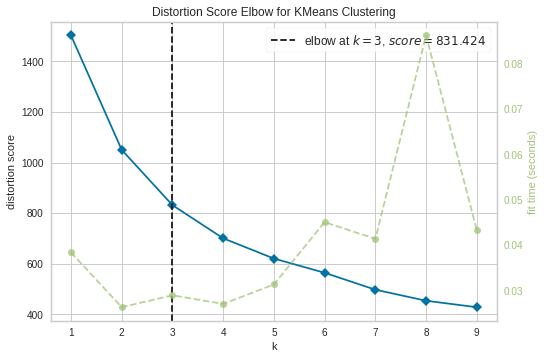

In [216]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(country_data_scaled)
visualize.poof()

In [217]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(country_data_scaled)

KMeans(n_clusters=3, random_state=1)

In [218]:
model.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [219]:
country_data['cluster_Id'] = model.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_Id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


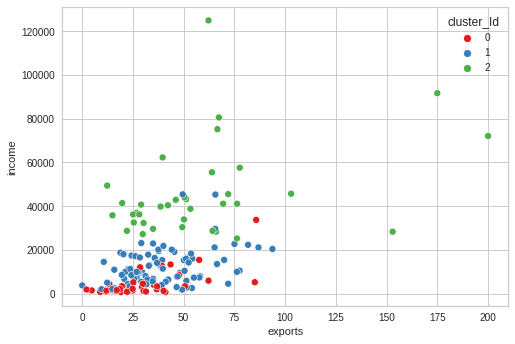

In [220]:
sns.scatterplot( x='exports', y='income', hue = 'cluster_Id' ,data = country_data, palette = 'Set1')

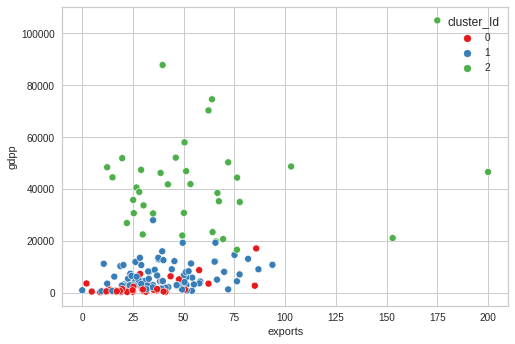

In [221]:
sns.scatterplot(x='exports', y='gdpp' , hue = 'cluster_Id' ,data = country_data, palette = 'Set1')

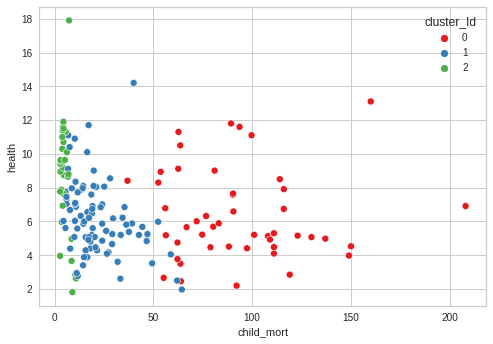

In [222]:
sns.scatterplot(x='child_mort', y='health' , hue = 'cluster_Id' ,data = country_data, palette = 'Set1')

In [223]:
country_data.groupby(['cluster_Id','country']).mean()

child_mort  exports  health  imports  \
cluster_Id country                                                      
0          Afghanistan                 90.2     10.0    7.58     44.9   
           Angola                     119.0     62.3    2.85     42.9   
           Benin                      111.0     23.8    4.10     37.2   
           Botswana                    52.5     43.6    8.30     51.3   
           Burkina Faso               116.0     19.2    6.74     29.6   
...                                     ...      ...     ...      ...   
2          Sweden                       3.0     46.2    9.63     40.7   
           Switzerland                  4.5     64.0   11.50     53.3   
           United Arab Emirates         8.6     77.7    3.66     63.6   
           United Kingdom               5.2     28.2    9.64     30.8   
           United States                7.3     12.4   17.90     15.8   

                                  income  inflation  life_expec  total_fer  \
cluster_Id country                                                           
0          Afghanistan            1610.0      9.440        56.2       5.82   
           Angola                 5900.0     22.400        60.1       6.16   
           Benin                  1820.0      0.885        61.8       5.36   
           Botswana              13300.0      8.920        57.1       2.88   
           Burkina Faso           1430.0      6.810        57.9       5.87   
...                                  ...        ...         ...        ...   
2          Sweden                42900.0      0.991        81.5       1.98   
           Switzerland           55500.0      0.317        82.2       1.52   
           United Arab Emirates  57600.0     12.500        76.5       1.87   
           United Kingdom        36200.0      1.570        80.3       1.92   
           United States         49400.0      1.220        78.7       1.93   

                                    gdpp  
cluster_Id country                        
0          Afghanistan             553.0  
           Angola                 3530.0  
           Benin                   758.0  
           Botswana               6350.0  
           Burkina Faso            575.0  
...                                  ...  
2          Sweden                52100.0  
           Switzerland           74600.0  
           United Arab Emirates  35000.0  
           United Kingdom        38900.0  
           United States         48400.0  

[167 rows x 9 columns]

In [224]:
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
country_data['cluster_Id']=country_data['cluster_Id'].map(cat)

In [225]:
px.choropleth(country_data, locationmode='country names', locations='country', color=country_data['cluster_Id'], title='Countries that need help',color_discrete_map={'Need Help':'#DB1C18','Might need help':'#ffcf3b','No Help needed':'#96ef6f'} ,projection='equirectangular')

In [226]:
need_help = country_data[country_data['cluster_Id']=='Need Help']['country']
need_help

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [227]:
need_help.count()

47

**Agglomerative clustering**

In [228]:
country_data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [229]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

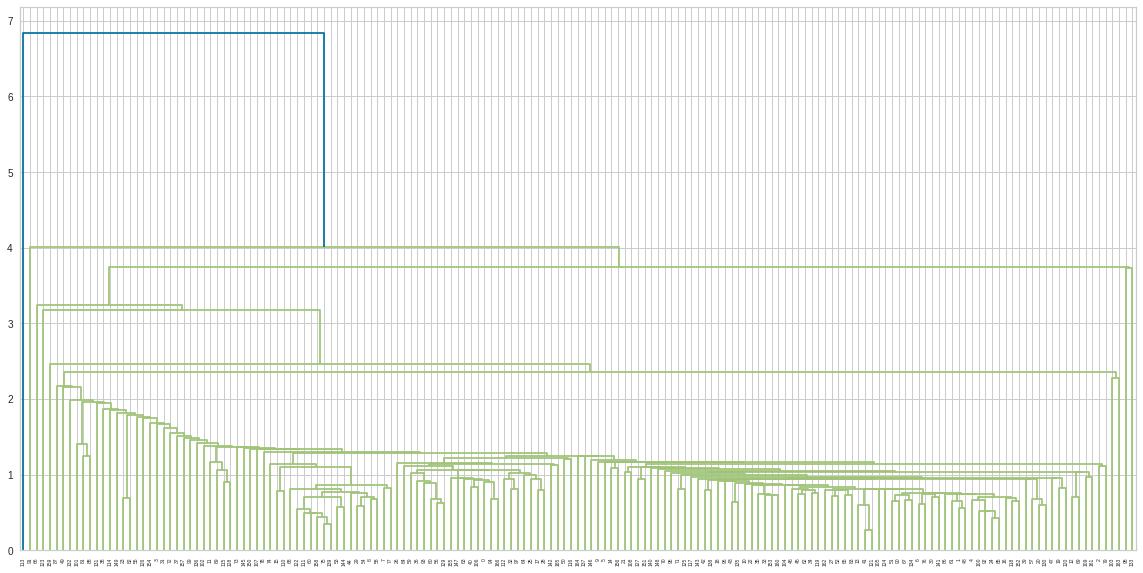

In [230]:
plt.figure(figsize = (20,10))
mergings = linkage(country_data_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

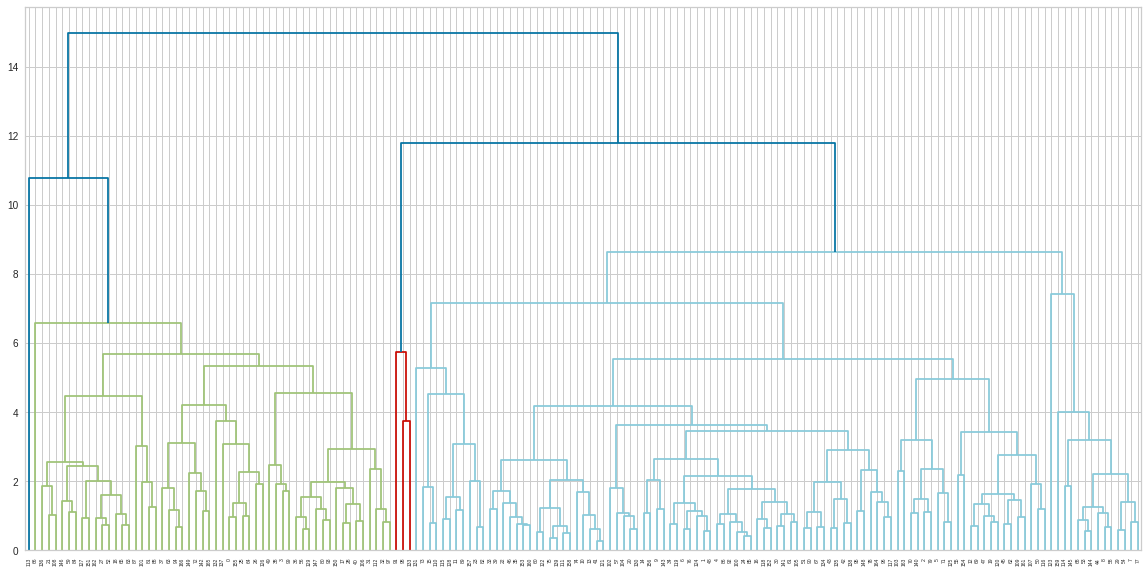

In [231]:
plt.figure(figsize = (20,10))
mergings = linkage(country_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [232]:
cluster_Id2 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_Id2

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [233]:
country_data['cluster_Id2'] = model.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_Id,cluster_Id2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Need Help,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might need help,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might need help,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Need Help,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might need help,1


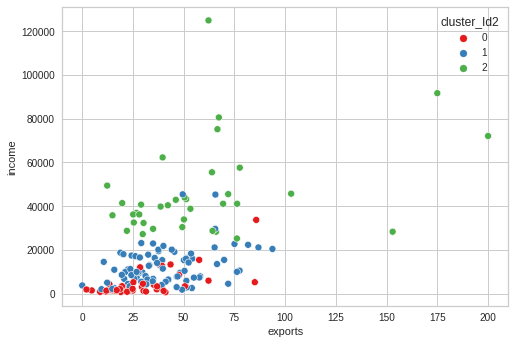

In [234]:
sns.scatterplot( x='exports', y='income', hue = 'cluster_Id2' ,data = country_data, palette = 'Set1')

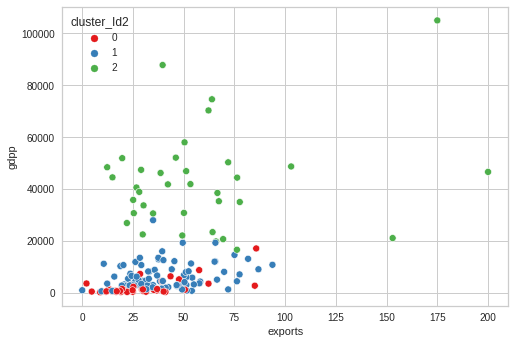

In [235]:
sns.scatterplot(x='exports', y='gdpp' , hue = 'cluster_Id2' ,data = country_data, palette = 'Set1')

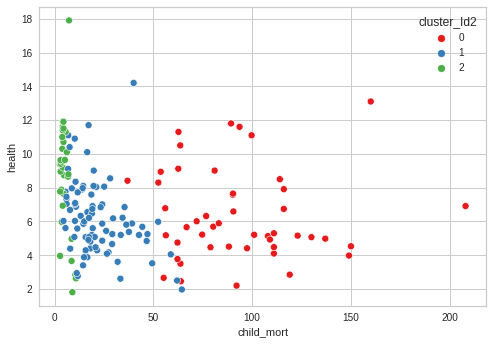

In [236]:
sns.scatterplot(x='child_mort', y='health' , hue = 'cluster_Id2' ,data = country_data, palette = 'Set1')

In [237]:
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
country_data['cluster_Id2']=country_data['cluster_Id2'].map(cat)

In [238]:
px.choropleth(country_data, locationmode='country names', locations='country', color=country_data['cluster_Id2'], title='Countries that need help',color_discrete_map={'Need Help':'#DB1C18','Might need help':'#ffcf3b','No Help needed':'#96ef6f'} ,projection='equirectangular')

In [239]:
need_help = country_data[country_data['cluster_Id2']=='Need Help']['country']
need_help

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [240]:
need_help.count()

47

Бидејќи беше наведено да одбереме еден модел кој што е најдобар, јас сакам да наведам дека во мојот пример со кластерирањето и двата алгоритми ги изваваат истите резутати. Односно во двата случаи јас го добив истиот резултат и истите држави на кои им е потребна помош. Но сметам дека со K-Means се изваваат во други случаи подобри резултати. Во кластерирањето најпрвин започнав со одредување на бројот на кластери се со цел да го добијам посакуваниот резултат.